Mounting Google Drive into Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the original GTSRB data

In [ ]:
from zipfile import ZipFile
fileName='/content/drive/My Drive/Final Year Project/1614253-gtsrb-german-traffic-sign.zip'
with ZipFile(fileName,'r') as zip:
  zip.extractall()
  print('gtsrb original done')

gtsrb original done


Unzipping the balanced GTSRB data done using the image augmentation process

In [ ]:
from zipfile import ZipFile
fileName='/content/drive/My Drive/Final Year Project/BalancedTrain.zip'
with ZipFile(fileName,'r') as zip:
  zip.extractall()
  print('balanced gtsrb original done')

balanced gtsrb original done


Importing the libraries to use 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import random
from skimage import transform
from skimage import exposure
from skimage import io
import tensorflow as tf
from PIL import Image
import datetime, os
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score, roc_auc_score
from keras import regularizers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


Initializing the variable and array data

In [ ]:
data = []
labels = []
classes = 43
cur_path = "/content"

Retrieve the images in the form of numpy data format

In [ ]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'BalancedTrain',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Converting the lists into numpy arrays. Split the data into 80% train data and 20% test data. Convert the lables into one hot encoding format 

(93333, 30, 30, 3) (93333,)


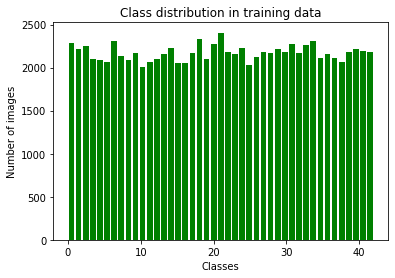

(74666, 30, 30, 3) (18667, 30, 30, 3) (74666,) (18667,)


In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

# setting the ranges and no. of intervals 
ranges = (0, 42) 
bins = 43
  
# plotting a histogram 
plt.hist(labels, bins, ranges, color = 'green', 
        histtype = 'bar', rwidth = 0.8) 
  
# x-axis label 
plt.xlabel('Classes') 
# frequency label 
plt.ylabel('Number of images') 
# plot title 
plt.title('Class distribution in training data') 
  
# function to show the plot 
plt.show() 

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

datagen = ImageDataGenerator(width_shift_range = 0.1,  
                  height_shift_range = 0.1,  
                  zoom_range = 0.2,  
                  shear_range = 0.1,  
                  rotation_range = 10) 
datagen.fit(X_train)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Build the model to train the data

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization(epsilon=1e-6))
model.add(Conv2D(filters=32, kernel_size=(5,5), kernel_regularizer=regularizers.l2(1e-5) , activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5),padding='same', activation='relu'))
model.add(BatchNormalization(epsilon=1e-6))
model.add(MaxPool2D(pool_size=3, strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_regularizer=regularizers.l2(1e-5) , activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_regularizer=regularizers.l2(1e-5) , activation='relu'))
model.add(BatchNormalization(epsilon=1e-6))
model.add(MaxPool2D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(43, activation='softmax'))

This is the summary for the layers of the model we made.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0

Train the data using the model we made

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit_generator(datagen.flow(X_train, y_train,  
                            batch_size = 32), epochs=epochs, validation_data=(X_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
2334/2334 [==============================] - 42s 18ms/step - loss: 1.3857 - accuracy: 0.5813 - val_loss: 0.3678 - val_accuracy: 0.8842
Epoch 2/15
2334/2334 [==============================] - 42s 18ms/step - loss: 0.4363 - accuracy: 0.8673 - val_loss: 0.2019 - val_accuracy: 0.9358
Epoch 3/15
2334/2334 [==============================] - 42s 18ms/step - loss: 0.2989 - accuracy: 0.9098 - val_loss: 0.2325 - val_accuracy: 0.9288
Epoch 4/15
2334/2334 [==============================] - 42s 18ms/step - loss: 0.2321 - accuracy: 0.9311 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 5/15
2334/2334 [==============================] - 43s 19ms/step - loss: 0.1999 - accuracy: 0.9410 - val_loss: 0.1493 - val_accuracy: 0.9577
Epoch 6/15
2334/2334 [==============================] - 42s 18ms/step - loss: 0.1739 - accuracy: 0.9498 - val_loss: 0.1276 - val_accuracy: 0.9648
Epoch 7/15
2334/2334 [==========================

Plotting the graphs for accuracy and valdiation accuracy.

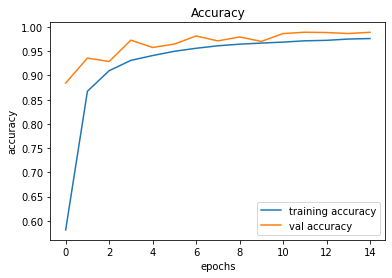

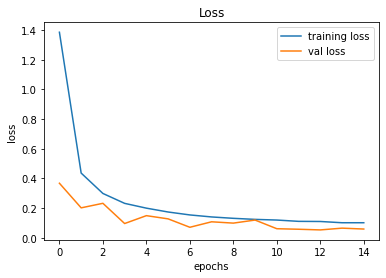

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Evaluation

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('/content/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
testdata=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    testdata.append(np.array(image))
X_test=np.array(testdata)
#pred = model.predict_classes(X_test)
pred = np.argmax(model.predict(X_test), axis=-1)
print("done")

done


Accuracy

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9689627870150436


Kappa Score

In [ ]:
cohen_kappa_score(labels, pred)

0.9677603302733726

Mutliclass ROC AUC 

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(labels, pred)

0.9769322892832731

Confusion Matrix

In [ ]:
 new_cm=confusion_matrix(labels, pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


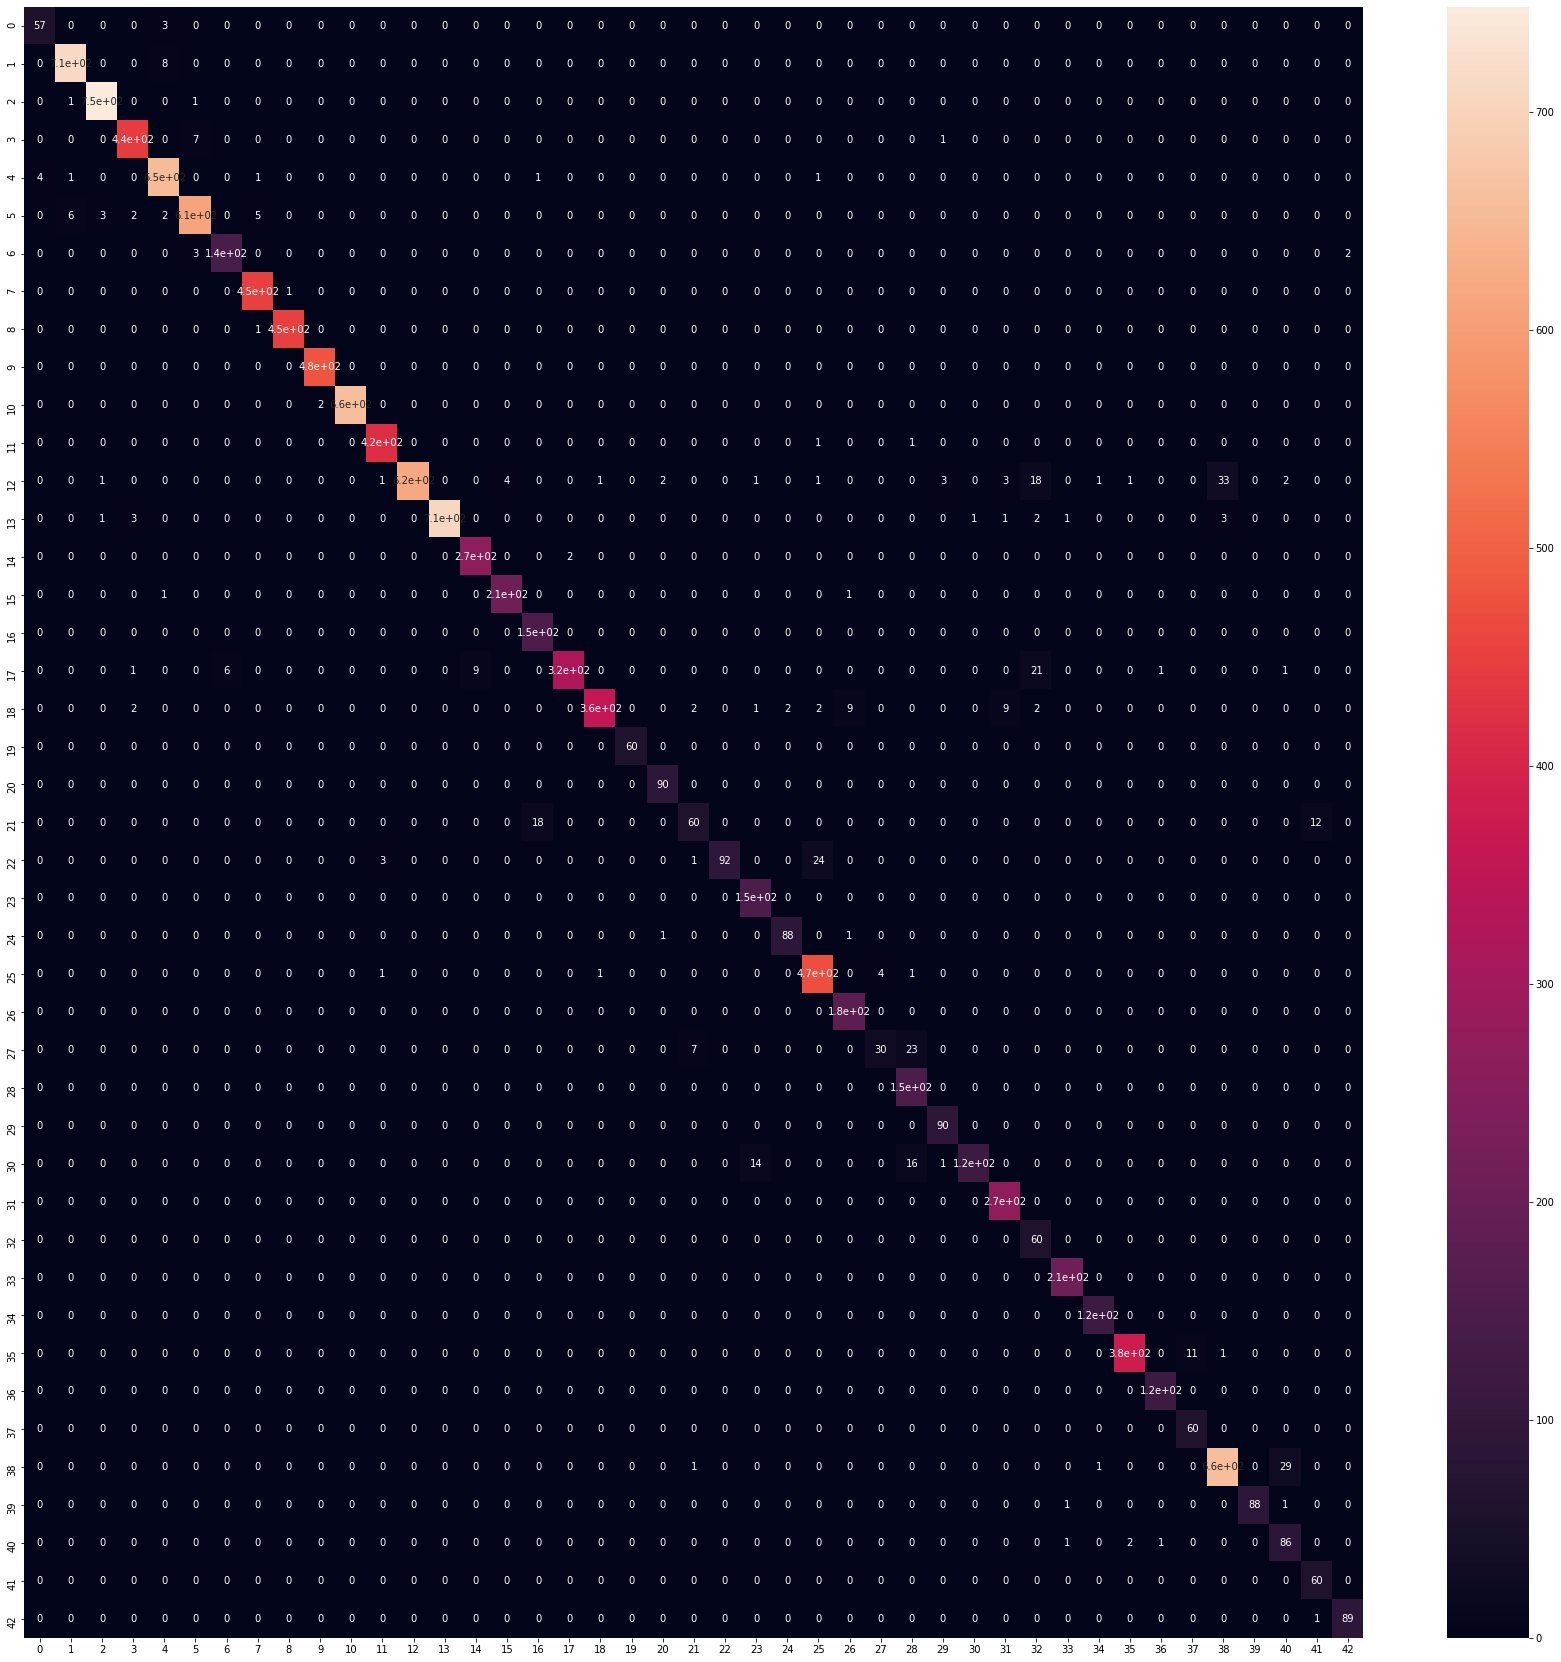

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(new_cm, index = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']],
                  columns = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']])
plt.figure(figsize = (30,30))
sn.heatmap(df_cm, annot=True)

In [ ]:
def process_cm(confusion_mat, i=0, to_print=True):
    # i means which class to choose to do one-vs-the-rest calculation
    # rows are actual obs whereas columns are predictions
    TP = confusion_mat[i,i]  # correctly labeled as i
    FP = confusion_mat[:,i].sum() - TP  # incorrectly labeled as i
    FN = confusion_mat[i,:].sum() - TP  # incorrectly labeled as non-i
    TN = confusion_mat.sum().sum() - TP - FP - FN
    if to_print:
        print('TP: {}'.format(TP))
        print('TN: {}'.format(TN))
        print('FP: {}'.format(FP))
        print('FN: {}'.format(FN))
  
    return TP, FP, FN, TN

for i in range(43):
    print('Calculating 2x2 contigency table for label{}'.format(i))
    process_cm(new_cm,i,to_print=True)

Calculating 2x2 contigency table for label0
TP: 57
TN: 12566
FP: 4
FN: 3
Calculating 2x2 contigency table for label1
TP: 712
TN: 11902
FP: 8
FN: 8
Calculating 2x2 contigency table for label2
TP: 748
TN: 11875
FP: 5
FN: 2
Calculating 2x2 contigency table for label3
TP: 442
TN: 12172
FP: 8
FN: 8
Calculating 2x2 contigency table for label4
TP: 652
TN: 11956
FP: 14
FN: 8
Calculating 2x2 contigency table for label5
TP: 612
TN: 11989
FP: 11
FN: 18
Calculating 2x2 contigency table for label6
TP: 145
TN: 12474
FP: 6
FN: 5
Calculating 2x2 contigency table for label7
TP: 449
TN: 12173
FP: 7
FN: 1
Calculating 2x2 contigency table for label8
TP: 449
TN: 12179
FP: 1
FN: 1
Calculating 2x2 contigency table for label9
TP: 480
TN: 12148
FP: 2
FN: 0
Calculating 2x2 contigency table for label10
TP: 658
TN: 11970
FP: 0
FN: 2
Calculating 2x2 contigency table for label11
TP: 418
TN: 12205
FP: 5
FN: 2
Calculating 2x2 contigency table for label12
TP: 618
TN: 11940
FP: 0
FN: 72
Calculating 2x2 contigency table

Classification Reports

In [ ]:
print(labels)
convertlabels = to_categorical(labels, 43)
print(convertlabels)

[16  1 38 ...  6  7 10]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
labelNames = [
'Speed limit (20km/h)',
'Speed limit (30km/h)',
'Speed limit (50km/h)',
'Speed limit (60km/h)',
'Speed limit (70km/h)',
'Speed limit (80km/h)',
'End of speed limit (80km/h)',
'Speed limit (100km/h)',
'Speed limit (120km/h)',
'No passing',
'No passing veh over 3.5 tons',
'Right-of-way at intersection',
'Priority road',
'Yield',
'Stop',
'No vehicles',
'Veh > 3.5 tons prohibited',
'No entry',
'General caution',
'Dangerous curve left',
'Dangerous curve right',
'Double curve',
'Bumpy road',
'Slippery road',
'Road narrows on the right',
'Road work',
'Traffic signals',
'Pedestrians',
'Children crossing',
'Bicycles crossing',
'Beware of ice/snow',
'Wild animals crossing',
'End speed + passing limits',
'Turn right ahead',
'Turn left ahead',
'Ahead only',
'Go straight or right',
'Go straight or left',
'Keep right',
'Keep left',
'Roundabout mandatory',
'End of no passing',
'End no passing veh > 3.5 tons'
]

In [ ]:
print(classification_report(convertlabels.argmax(axis=1),
	pred, target_names=labelNames))

                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.93      0.95      0.94        60
         Speed limit (30km/h)       0.99      0.99      0.99       720
         Speed limit (50km/h)       0.99      1.00      1.00       750
         Speed limit (60km/h)       0.98      0.98      0.98       450
         Speed limit (70km/h)       0.98      0.99      0.98       660
         Speed limit (80km/h)       0.98      0.97      0.98       630
  End of speed limit (80km/h)       0.96      0.97      0.96       150
        Speed limit (100km/h)       0.98      1.00      0.99       450
        Speed limit (120km/h)       1.00      1.00      1.00       450
                   No passing       1.00      1.00      1.00       480
 No passing veh over 3.5 tons       1.00      1.00      1.00       660
 Right-of-way at intersection       0.99      1.00      0.99       420
                Priority road       1.00      0.90      0.94       690
     

Testing New Images

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


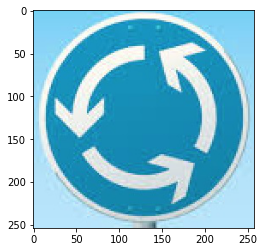

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1.34330496e-20 1.84366623e-21 4.28670056e-29 7.50796663e-22
 7.80942556e-24 7.78795393e-22 9.55254021e-19 3.58277194e-18
 1.43199450e-18 4.82648423e-25 1.22499067e-32 1.02951002e-23
 1.08138810e-18 3.68556407e-24 1.02169992e-25 5.29594708e-24
 4.01293467e-22 6.04729107e-22 9.12575594e-24 3.14190973e-26
 1.01114894e-19 2.30689474e-24 3.67827718e-30 3.16548530e-21
 5.78550462e-23 3.21941315e-26 1.57469748e-23 2.19770923e-28
 2.36659988e-22 4.80713316e-26 1.49687524e-18 2.77597881e-23
 3.01415745e-24 1.04156296e-14 3.85647968e-14 5.88886369e-16
 1.34074487e-13 2.25825706e-13 2.47456102e-15 1.59357679e-14
 1.00000000e+00 1.58266920e-25 1.94708526e-20]
[1.343304

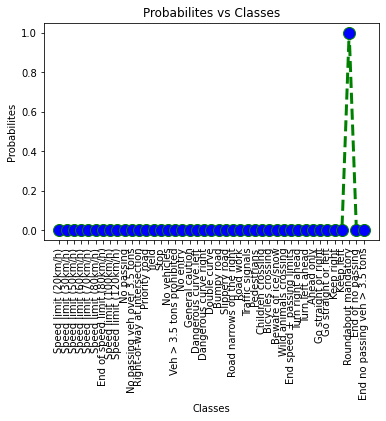

40
Roundabout mandatory


In [ ]:
from PIL import ImageTk, Image
import numpy

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

image = Image.open('/content/drive/My Drive/Final Year Project/my_sign_images/sign8.jpg')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/Final Year Project/my_sign_images/sign8.jpg')
imgplot = plt.imshow(img)
plt.show()

image = image.resize((30,30))
image = numpy.expand_dims(image, axis=0)
image = numpy.array(image)
pred = model.predict_classes([image])[0]
probab = model.predict(([image])[0]).ravel()
print(probab)
print(probab.tolist())

# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 
  
# heights of bars 
height = [10, 24, 36, 40, 5] 
  
# labels for bars 
tick_label = ['Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing', 
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons']

  
# plotting the points  
plt.plot(tick_label, probab.tolist(), color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
  

plt.xticks(rotation=90)  
# naming the x axis 
plt.xlabel('Classes') 
# naming the y axis 
plt.ylabel('Probabilites') 
  
# giving a title to my graph 
plt.title('Probabilites vs Classes') 
  
# function to show the plot 
plt.show() 

print(model.predict_classes([image])[0])
sign = classes[pred+1]
print(sign)

Saving the model into drive

In [ ]:
model.save("/content/drive/My Drive/Final Year Project/Output/Model2fyp_model.h5")
print("done save")

done save
